In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_sub = pd.read_csv("sample_submission.csv")
stores = pd.read_csv("stores.csv")
items = pd.read_csv("items.csv")
transactions = pd.read_csv("transactions.csv")
oil = pd.read_csv("oil.csv")
holiday = pd.read_csv("holidays_events.csv")

C:\Users\parik\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Basic EDA

In [3]:
print("Shape of train:" , train.shape)
print("Shape of test:" , test.shape)
print("Shape of stores:" , stores.shape)
print("Shape of items:" , items.shape)
print("Shape of transactions:" , transactions.shape)
print("Shape of oil:" , oil.shape)
print("Shape of holiday:" , holiday.shape)

Shape of train: (125497040, 6)
Shape of test: (1048575, 5)
Shape of stores: (54, 5)
Shape of items: (4100, 4)
Shape of transactions: (83488, 3)
Shape of oil: (1218, 2)
Shape of holiday: (350, 6)


In [4]:
print(train.info(),"\n")
print(test.info(),"\n")
print(stores.info(),"\n")
print(items.info(),"\n")
print(transactions.info(),"\n")
print(oil.info(),"\n")
print(holiday.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125497040 entries, 0 to 125497039
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   item_nbr     int64  
 4   unit_sales   float64
 5   onpromotion  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.6+ GB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   id           1048575 non-null  int64 
 1   date         1048575 non-null  object
 2   store_nbr    1048575 non-null  int64 
 3   item_nbr     1048575 non-null  int64 
 4   onpromotion  1048575 non-null  bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 33.0+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null 

## 1) Train Set

In [5]:
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


In [6]:
train.tail()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
125497035,125497035,2017-08-15,54,2089339,4.0,False
125497036,125497036,2017-08-15,54,2106464,1.0,True
125497037,125497037,2017-08-15,54,2110456,192.0,False
125497038,125497038,2017-08-15,54,2113914,198.0,True
125497039,125497039,2017-08-15,54,2116416,2.0,False


In [7]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [8]:
# Converting date column to datetime type to reduce the memory usage

print("size before:", train["date"].memory_usage(deep=True) * 1e-6)

train["date"] = pd.to_datetime(train["date"])# conversion object to date data type

print("size after: ", train["date"].memory_usage(deep=True) * 1e-6)

size before: 8408.301808
size after:  1003.976448


In [9]:
for i in stores:
    print("unique values in",i)
    print(stores[str(i)].unique(),"\n--------------")


unique values in store_nbr
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54] 
--------------
unique values in city
['Quito' 'Santo Domingo' 'Cayambe' 'Latacunga' 'Riobamba' 'Ibarra'
 'Guaranda' 'Puyo' 'Ambato' 'Guayaquil' 'Salinas' 'Daule' 'Babahoyo'
 'Quevedo' 'Playas' 'Libertad' 'Cuenca' 'Loja' 'Machala' 'Esmeraldas'
 'Manta' 'El Carmen'] 
--------------
unique values in state
['Pichincha' 'Santo Domingo de los Tsachilas' 'Cotopaxi' 'Chimborazo'
 'Imbabura' 'Bolivar' 'Pastaza' 'Tungurahua' 'Guayas' 'Santa Elena'
 'Los Rios' 'Azuay' 'Loja' 'El Oro' 'Esmeraldas' 'Manabi'] 
--------------
unique values in type
['D' 'B' 'C' 'E' 'A'] 
--------------
unique values in cluster
[13  8  9  4  6 15  7  3 12 16  1 10  2  5 11 14 17] 
--------------


In [10]:

train.head(20)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN
5,5,2013-01-01,25,108786,3.0,NaN
6,6,2013-01-01,25,108797,1.0,NaN
7,7,2013-01-01,25,108952,1.0,NaN
8,8,2013-01-01,25,111397,13.0,NaN
9,9,2013-01-01,25,114790,3.0,NaN


In [11]:
train.shape

(125497040, 6)

1) Filtering out stores where city = 'Daule','Quito','Santo Domingo'
2) Filtering out stores where family = 'Dairy','Bread/Bakery'
NOTE:Doing mannual filtering because not able to apply join or any other technique on such a big file due to CPU and RAM restrictions.

In [29]:
store_number = (stores.loc[(stores['city']=='Daule') | (stores['city']=='Quito') | (stores['city']=='Santo Domingo')])['store_nbr'].tolist()
print("Stores which are present in these 3 citites:","\n",store_number)

Stores which are present in these 3 citites: 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 16, 17, 18, 20, 21, 27, 44, 45, 46, 47, 48, 49]


In [30]:
item_number = (items.loc[(items['family']=='BREAD/BAKERY') | (items['family']=='DAIRY')])['item_nbr'].tolist()

In [31]:
train_subset = train[train['store_nbr'].isin(store_number) & train['item_nbr'].isin(item_number)]
print(train_subset.shape)

(6817656, 10)


In [32]:
train_subset.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type,cluster
0,578,2013-01-02,1,103665,2.0,NaN,Quito,Pichincha,D,13
1,618,2013-01-02,1,122095,1.0,NaN,Quito,Pichincha,D,13
2,621,2013-01-02,1,123347,3.0,NaN,Quito,Pichincha,D,13
3,628,2013-01-02,1,129635,29.0,NaN,Quito,Pichincha,D,13
4,632,2013-01-02,1,153395,5.0,NaN,Quito,Pichincha,D,13


### In train_subset removed all the items in regards to dairy / bakery products 


### Left join on "Train & Stores","Train & Items", "Train & Oil" and "Train & Holiday". 
### Note: Here we are using the train set for LEFT JOIN after applying given filters so that it will consume lesser amount of memory.

In [33]:
# Left Join - Train & Stores
train = pd.merge(train_subset, stores, on = 'store_nbr', how = 'left')
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city_x,state_x,type_x,cluster_x,city_y,state_y,type_y,cluster_y
0,578,2013-01-02,1,103665,2.0,NaN,Quito,Pichincha,D,13,Quito,Pichincha,D,13
1,618,2013-01-02,1,122095,1.0,NaN,Quito,Pichincha,D,13,Quito,Pichincha,D,13
2,621,2013-01-02,1,123347,3.0,NaN,Quito,Pichincha,D,13,Quito,Pichincha,D,13
3,628,2013-01-02,1,129635,29.0,NaN,Quito,Pichincha,D,13,Quito,Pichincha,D,13
4,632,2013-01-02,1,153395,5.0,NaN,Quito,Pichincha,D,13,Quito,Pichincha,D,13


In [34]:

train.shape

(6817656, 14)

In [35]:
# Left Join - Train & Items 
train_subset = pd.merge(train_subset, items, on = 'item_nbr', how = 'left')
train_subset.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type,cluster,family,class,perishable
0,578,2013-01-02,1,103665,2.0,NaN,Quito,Pichincha,D,13,BREAD/BAKERY,2712,1
1,618,2013-01-02,1,122095,1.0,NaN,Quito,Pichincha,D,13,DAIRY,2124,1
2,621,2013-01-02,1,123347,3.0,NaN,Quito,Pichincha,D,13,DAIRY,2114,1
3,628,2013-01-02,1,129635,29.0,NaN,Quito,Pichincha,D,13,DAIRY,2112,1
4,632,2013-01-02,1,153395,5.0,NaN,Quito,Pichincha,D,13,BREAD/BAKERY,2704,1


In [36]:
train_subset.shape

(6817656, 13)

In [37]:
oil["date"] = pd.to_datetime(oil["date"])

# Left Join - Train & Oil

train_subset = pd.merge(train_subset, oil, on = 'date', how = 'left')
train_subset.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type,cluster,family,class,perishable,dcoilwtico
0,578,2013-01-02,1,103665,2.0,NaN,Quito,Pichincha,D,13,BREAD/BAKERY,2712,1,97.46
1,618,2013-01-02,1,122095,1.0,NaN,Quito,Pichincha,D,13,DAIRY,2124,1,97.46
2,621,2013-01-02,1,123347,3.0,NaN,Quito,Pichincha,D,13,DAIRY,2114,1,97.46
3,628,2013-01-02,1,129635,29.0,NaN,Quito,Pichincha,D,13,DAIRY,2112,1,97.46
4,632,2013-01-02,1,153395,5.0,NaN,Quito,Pichincha,D,13,BREAD/BAKERY,2704,1,97.46


In [38]:
train_subset.shape

(6817656, 14)

### All th needed colums have been added to train_subset to make easier qurries.

### ASSUMPTION 1: Dates having type 'Additional','Bridge','Event',and 'Transfer' are considered to be a holiday. Hence there will be only two types of day categories available - a) Work Day and b) Holiday 

In [39]:
holiday['type'] = holiday['type'].replace(['Additional','Bridge','Event','Transfer'], 'Holiday')
mask = (holiday['transferred'] == True)
holiday['type'][mask] = 'Work Day'# all transfere values that were true those holidays are converted into work days 
print(holiday['type'].value_counts())

Holiday     333
Work Day     17
Name: type, dtype: int64


C:\Users\parik\AppData\Local\Temp/ipykernel_2192/2876665959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holiday['type'][mask] = 'Work Day'# all transfere values that were true those holidays are converted into work days


In [40]:
holiday.head(20)


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [41]:
holiday["date"] = pd.to_datetime(holiday["date"])

# Left Join - Train & Holiday
train_subset = pd.merge(train_subset, holiday, on = 'date', how = 'left')
train_subset = train_subset.drop(['locale', 'locale_name','description','transferred'], axis=1)
train_subset = train_subset.rename(columns={"type_y": "day_type", "type_x": "type","dcoilwtico":"oil_price"})


In [42]:
train_subset.head(20)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type,cluster,family,class,perishable,oil_price,day_type
0,578,2013-01-02,1,103665,2.0,NaN,Quito,Pichincha,D,13,BREAD/BAKERY,2712,1,97.46,NaN
1,618,2013-01-02,1,122095,1.0,NaN,Quito,Pichincha,D,13,DAIRY,2124,1,97.46,NaN
2,621,2013-01-02,1,123347,3.0,NaN,Quito,Pichincha,D,13,DAIRY,2114,1,97.46,NaN
3,628,2013-01-02,1,129635,29.0,NaN,Quito,Pichincha,D,13,DAIRY,2112,1,97.46,NaN
4,632,2013-01-02,1,153395,5.0,NaN,Quito,Pichincha,D,13,BREAD/BAKERY,2704,1,97.46,NaN
5,633,2013-01-02,1,153398,3.0,NaN,Quito,Pichincha,D,13,BREAD/BAKERY,2708,1,97.46,NaN
6,640,2013-01-02,1,158842,1.0,NaN,Quito,Pichincha,D,13,DAIRY,2124,1,97.46,NaN
7,647,2013-01-02,1,164088,6.0,NaN,Quito,Pichincha,D,13,DAIRY,2116,1,97.46,NaN
8,655,2013-01-02,1,165718,4.0,NaN,Quito,Pichincha,D,13,BREAD/BAKERY,2718,1,97.46,NaN
9,667,2013-01-02,1,173113,2.0,NaN,Quito,Pichincha,D,13,DAIRY,2114,1,97.46,NaN


In [43]:
train_subset.shape

(6948464, 15)

### Handling Missing Values in Train Set

In [44]:
train_subset.isnull().sum().sort_values(ascending=False)

day_type       5779926
oil_price      2305567
onpromotion    1239017
id                   0
date                 0
store_nbr            0
item_nbr             0
unit_sales           0
city                 0
state                0
type                 0
cluster              0
family               0
class                0
perishable           0
dtype: int64

### ASSUMPTION 2: Dates which are not present in the holiday dataset are considered to be Work Day. 

In [45]:
# Replacing NA values in day_type column with Work Day
train_subset['day_type'] = train_subset['day_type'].fillna("Work Day")


In [46]:
# Replace missing values in Oil_Price
train_subset['oil_price'] = train_subset["oil_price"].fillna(axis = 0,method = 'ffill')

In [47]:
train_subset.isnull().sum()

id                   0
date                 0
store_nbr            0
item_nbr             0
unit_sales           0
onpromotion    1239017
city                 0
state                0
type                 0
cluster              0
family               0
class                0
perishable           0
oil_price            0
day_type             0
dtype: int64

### ASSUMPTION 3: Considering the missing values in onpromotion field as "Not Mentioned". Hence there will be 3 categories available in this field - 'True', 'False', and 'Not Mentioned'.

In [48]:
# Creating a new category in onpromotion column, where NA values are replaced with "Not Mentioned"
train_subset['onpromotion'] = train_subset['onpromotion'].fillna("Not Mentioned")

### Removing the datasets which are not required anymore to clear some space.

In [49]:
train_subset.isnull().sum()

id             0
date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
city           0
state          0
type           0
cluster        0
family         0
class          0
perishable     0
oil_price      0
day_type       0
dtype: int64

In [50]:
train_subset['date'].value_counts()


2017-06-25    16842
2016-06-25    15966
2014-06-25    14044
2015-06-25    12522
2017-07-03    10862
              ...  
2013-01-07     2200
2013-01-10     2195
2013-01-08     2194
2013-01-03     2177
2013-01-04     2175
Name: date, Length: 1679, dtype: int64

### Adding additional fields (for EDA purpose) - Month & Year using Date column

In [51]:
train_subset["date"] = pd.to_datetime(train_subset["date"])
train_subset['Month'] = train_subset['date'].dt.strftime('%B')
train_subset['Year'] = train_subset['date'].dt.strftime('%Y')

In [52]:
print(train_subset['family'].value_counts())

DAIRY           4584145
BREAD/BAKERY    2364319
Name: family, dtype: int64


## Detailed EDA

In [53]:
import matplotlib.pyplot as plt

### 1) Yearly Transactions

In [54]:
year_df = train_subset['Year'].value_counts().to_frame().reset_index().rename(columns={'index':'Year','Year':'count'}).sort_values(by = 'Year')
print(year_df)

   Year    count
4  2013   931794
2  2014  1313201
1  2015  1575421
0  2016  1886761
3  2017  1241287


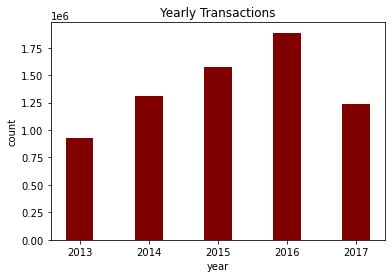

In [55]:

plt.bar(year_df['Year'], year_df['count'], color ='maroon',width = 0.4)
plt.xlabel("year")
plt.ylabel("count")
plt.title("Yearly Transactions")
plt.show()

#### Interpretation: The retail store has seen a constant annual growth rate of around 20% in all the years except for 2013-2014 where the growth was 40%. the values on the y axis are to be considered as raise to the power 6.

## 2) How many stores are there in a city ?

In [57]:
city_store_df = train_subset[['store_nbr','city']].drop_duplicates().groupby('city').size().to_frame().reset_index().rename(columns={0:'count'})


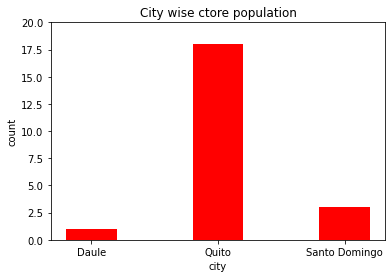

In [58]:

plt.bar(city_store_df['city'],city_store_df['count'] , color ='red',width = 0.4)
plt.ylim(0,20)
plt.xlabel("city")
plt.ylabel("count")
plt.title("City wise ctore population")
plt.show()

#### Interpretation: Quito has the maximum number of stores while Santo Domingo and Daule seem to be  new markets for the retail store with only 3 and 1 stores respectively.  

### 3) Correlation between Oil Prices and Unit Sales

In [59]:
oil_and_sales= train_subset[['date','oil_price','unit_sales']]
d = {'oil_price':'oil_price', 'unit_sales':'total_sales'}
oil_and_sales = oil_and_sales.groupby('date').agg({'oil_price':'mean', 'unit_sales':'sum'}).rename(columns=d)

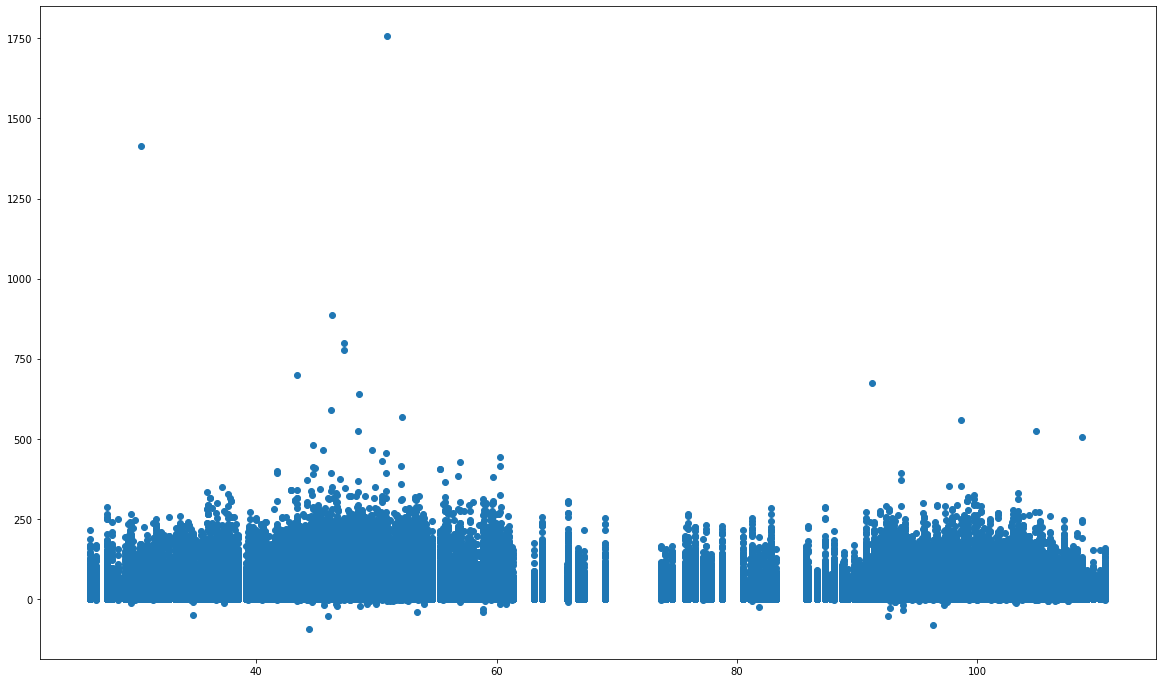

In [60]:
x = train_subset['oil_price']
y = train_subset['unit_sales']



plt.figure(figsize=(20,12))
#plt.rcParams["figure.figsize"] = (20,12)

plt.scatter(x, y)
plt.show()

#### Interpretation: When oil prices are in the range of 30-60, total unit sold per day is not varying too much, but when oil price is increasing beyound 60 the total unit sold per day reduces by around 10k to 15k. This shows that the citizens of Ecuador face an impact of oil prices and their buying behaviour also changes when the oil prices increase beyond 60.

### Forecasting

In [98]:
#!pip install sklearn
import xgboost as xgb
import random
from sklearn.model_selection import train_test_split

### 1) Adding day and quarter fields using date field

In [99]:
#train_subset['date'] = pd.to_datetime(train_subset['date'],format = '%Y-%m-%d')
train_subset['day'] = train_subset['date'].dt.day
train_subset['quarter'] = train_subset['date'].dt.quarter
train_subset['month'] = train_subset['date'].dt.month
train_subset['year'] = train_subset['date'].dt.year

In [100]:
train_subset.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type,cluster,...,class,perishable,oil_price,day_type,Month,Year,day,quarter,month,year
0,578,2013-01-02,1,103665,2.0,Not Mentioned,Quito,Pichincha,D,13,...,2712,1,97.46,Work Day,January,2013,2,1,1,2013
1,618,2013-01-02,1,122095,1.0,Not Mentioned,Quito,Pichincha,D,13,...,2124,1,97.46,Work Day,January,2013,2,1,1,2013
2,621,2013-01-02,1,123347,3.0,Not Mentioned,Quito,Pichincha,D,13,...,2114,1,97.46,Work Day,January,2013,2,1,1,2013
3,628,2013-01-02,1,129635,29.0,Not Mentioned,Quito,Pichincha,D,13,...,2112,1,97.46,Work Day,January,2013,2,1,1,2013
4,632,2013-01-02,1,153395,5.0,Not Mentioned,Quito,Pichincha,D,13,...,2704,1,97.46,Work Day,January,2013,2,1,1,2013


### 2) Dropping columns which are correlated and hence will not be used

In [101]:
train_subset = train_subset.drop(['city','state','perishable','type','cluster','class','date','Month','Year'], axis=1)

In [102]:
train_subset.head()

,id,store_nbr,item_nbr,unit_sales,onpromotion,family,oil_price,day_type,day,quarter,month,year
0,578,1,103665,2.0,Not Mentioned,BREAD/BAKERY,97.46,Work Day,2,1,1,2013
1,618,1,122095,1.0,Not Mentioned,DAIRY,97.46,Work Day,2,1,1,2013
2,621,1,123347,3.0,Not Mentioned,DAIRY,97.46,Work Day,2,1,1,2013
3,628,1,129635,29.0,Not Mentioned,DAIRY,97.46,Work Day,2,1,1,2013
4,632,1,153395,5.0,Not Mentioned,BREAD/BAKERY,97.46,Work Day,2,1,1,2013


In [103]:
train_subset['onpromotion'] = train_subset['onpromotion'].replace(True,1)
train_subset['onpromotion'] = train_subset['onpromotion'].replace(False,0)
train_subset['onpromotion'] = train_subset['onpromotion'].replace('Not Mentioned',2)
train_subset['family'] = train_subset['family'].replace('BREAD/BAKERY',0)
train_subset['family'] = train_subset['family'].replace('DAIRY',1)
train_subset['day_type'] = train_subset['day_type'].replace('Holiday',0)
train_subset['day_type'] = train_subset['day_type'].replace('Work Day',1)

In [104]:
train_subset.to_csv('train_subset')

In [105]:
#train_subset['onpromotion'] = train_subset['onpromotion'].astype(int)
# train1
train1 = train_subset.drop(['unit_sales'], axis = 1)
print(train1.head())

# train2
train2 = train_subset.drop(['id','store_nbr','item_nbr','onpromotion', 'family','oil_price','day_type','month','year','day','quarter'], axis = 1)
print(train2.head())


    id  store_nbr  item_nbr  onpromotion  family  oil_price  day_type  day  \
0  578          1    103665            2       0      97.46         1    2   
1  618          1    122095            2       1      97.46         1    2   
2  621          1    123347            2       1      97.46         1    2   
3  628          1    129635            2       1      97.46         1    2   
4  632          1    153395            2       0      97.46         1    2   

   quarter  month  year  
0        1      1  2013  
1        1      1  2013  
2        1      1  2013  
3        1      1  2013  
4        1      1  2013  
   unit_sales
0         2.0
1         1.0
2         3.0
3        29.0
4         5.0


In [106]:
Xg_train, Xg_valid = train_test_split(train1, test_size=0.20, random_state=10)
Yg_train, Yg_valid = train_test_split(train2, test_size=0.20, random_state=10)
features1 = list(train1.columns.values)
features2 = list(train2.columns.values)

In [107]:
print(features1)
print(features2)


['id', 'store_nbr', 'item_nbr', 'onpromotion', 'family', 'oil_price', 'day_type', 'day', 'quarter', 'month', 'year']
['unit_sales']


In [108]:
dtrain = xgb.DMatrix(Xg_train[features1],Yg_train[features2])
dvalid = xgb.DMatrix(Xg_valid[features1],Yg_valid[features2])

In [109]:
from sklearn.metrics import mean_squared_error

In [139]:
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat / y-1) ** 2))

In [140]:
import math
from sklearn.preprocessing import minmax_scale

In [141]:
#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = minmax_scale(np.sqrt(np.mean([(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)])),feature_range=(0,1))
    return out_put

In [142]:
def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    y1 = np.expm1(yhat)
    return "rmspe", rmspe(y, yhat)


In [143]:
params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.3,
          "max_depth": 10,
          "subsample": 0.9,
          "colsample_bytree": 0.7,
          "silent": 1,
          "seed": 1301
          }
num_boost_round = 15
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]


In [144]:
gbm = xgb.train(params, dtrain, num_boost_round, evals = watchlist,early_stopping_rounds = 5, feval = rmspe_xg, verbose_eval = True)


[19:40:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-rmse:12.73811	train-rmspe:1.19360	eval-rmse:12.86467	eval-rmspe:0.94340


C:\Users\parik\AppData\Local\Temp/ipykernel_3180/2704543369.py:2: RuntimeWarning: overflow encountered in expm1
  y = np.expm1(y.get_label())


[1]	train-rmse:11.43967	train-rmspe:1.90194	eval-rmse:11.58248	eval-rmspe:1.08481
[2]	train-rmse:10.86058	train-rmspe:2.01904	eval-rmse:11.01168	eval-rmspe:1.17228
[3]	train-rmse:9.89912	train-rmspe:2.11772	eval-rmse:10.06215	eval-rmspe:1.22752


C:\Users\parik\AppData\Local\Temp/ipykernel_3180/2704543369.py:3: RuntimeWarning: overflow encountered in expm1
  y1 = np.expm1(yhat)


[4]	train-rmse:9.52331	train-rmspe:2.22688	eval-rmse:9.69800	eval-rmspe:1.29453


In [145]:
yhat = gbm.predict(xgb.DMatrix(Xg_valid[features1]))
error = rmspe(Yg_valid.unit_sales.values, np.expm1(yhat))

C:\Users\parik\AppData\Local\Temp/ipykernel_3180/1532819015.py:2: RuntimeWarning: overflow encountered in expm1
  error = rmspe(Yg_valid.unit_sales.values, np.expm1(yhat))


## Prepare Test set for Forecasting
### Note: All the assumptions taken on Train Set are same for Test Set as well.

In [146]:
# Filtering out data based on city and family
test_subset = test[test['store_nbr'].isin(store_number) & test['item_nbr'].isin(item_number)]
print(test_subset.shape)

(39270, 5)


In [147]:
# Left Join - Test & Stores
test_subset = pd.merge(test_subset, stores, on = 'store_nbr', how = 'left')
test_subset.head()

,id,date,store_nbr,item_nbr,onpromotion,city,state,type,cluster
0,125497044,16-08-2017,1,103665,False,Quito,Pichincha,D,13
1,125497094,16-08-2017,1,122095,False,Quito,Pichincha,D,13
2,125497097,16-08-2017,1,123347,False,Quito,Pichincha,D,13
3,125497106,16-08-2017,1,129635,False,Quito,Pichincha,D,13
4,125497110,16-08-2017,1,153239,False,Quito,Pichincha,D,13


In [148]:
# Left Join - Test & Items 
test_subset = pd.merge(test_subset, items, on = 'item_nbr', how = 'left')
test_subset.head()

,id,date,store_nbr,item_nbr,onpromotion,city,state,type,cluster,family,class,perishable
0,125497044,16-08-2017,1,103665,False,Quito,Pichincha,D,13,BREAD/BAKERY,2712,1
1,125497094,16-08-2017,1,122095,False,Quito,Pichincha,D,13,DAIRY,2124,1
2,125497097,16-08-2017,1,123347,False,Quito,Pichincha,D,13,DAIRY,2114,1
3,125497106,16-08-2017,1,129635,False,Quito,Pichincha,D,13,DAIRY,2112,1
4,125497110,16-08-2017,1,153239,False,Quito,Pichincha,D,13,BREAD/BAKERY,2712,1


In [149]:
test_subset["date"] = pd.to_datetime(test_subset["date"])
test_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39270 entries, 0 to 39269
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           39270 non-null  int64         
 1   date         39270 non-null  datetime64[ns]
 2   store_nbr    39270 non-null  int64         
 3   item_nbr     39270 non-null  int64         
 4   onpromotion  39270 non-null  bool          
 5   city         39270 non-null  object        
 6   state        39270 non-null  object        
 7   type         39270 non-null  object        
 8   cluster      39270 non-null  int64         
 9   family       39270 non-null  object        
 10  class        39270 non-null  int64         
 11  perishable   39270 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(6), object(4)
memory usage: 3.6+ MB


In [150]:
# Left Join - Test & Oil
test_subset = pd.merge(test_subset, oil, on = 'date', how = 'left')
test_subset.head()

,id,date,store_nbr,item_nbr,onpromotion,city,state,type,cluster,family,class,perishable,dcoilwtico
0,125497044,2017-08-16,1,103665,False,Quito,Pichincha,D,13,BREAD/BAKERY,2712,1,46.8
1,125497094,2017-08-16,1,122095,False,Quito,Pichincha,D,13,DAIRY,2124,1,46.8
2,125497097,2017-08-16,1,123347,False,Quito,Pichincha,D,13,DAIRY,2114,1,46.8
3,125497106,2017-08-16,1,129635,False,Quito,Pichincha,D,13,DAIRY,2112,1,46.8
4,125497110,2017-08-16,1,153239,False,Quito,Pichincha,D,13,BREAD/BAKERY,2712,1,46.8


In [151]:
# Left Join - Test & Holiday
test_subset = pd.merge(test_subset, holiday, on = 'date', how = 'left')
test_subset = test_subset.drop(['locale', 'locale_name','description','transferred'], axis=1)
test_subset = test_subset.rename(columns={"type_y": "day_type", "type_x": "type","dcoilwtico":"oil_price"})
test_subset.head()

,id,date,store_nbr,item_nbr,onpromotion,city,state,type,cluster,family,class,perishable,oil_price,day_type
0,125497044,2017-08-16,1,103665,False,Quito,Pichincha,D,13,BREAD/BAKERY,2712,1,46.8,NaN
1,125497094,2017-08-16,1,122095,False,Quito,Pichincha,D,13,DAIRY,2124,1,46.8,NaN
2,125497097,2017-08-16,1,123347,False,Quito,Pichincha,D,13,DAIRY,2114,1,46.8,NaN
3,125497106,2017-08-16,1,129635,False,Quito,Pichincha,D,13,DAIRY,2112,1,46.8,NaN
4,125497110,2017-08-16,1,153239,False,Quito,Pichincha,D,13,BREAD/BAKERY,2712,1,46.8,NaN


### Handling Missing Values in Test Set

In [152]:
test_subset.isnull().sum().sort_values(ascending=False)

day_type       39270
oil_price      15708
id                 0
date               0
store_nbr          0
item_nbr           0
onpromotion        0
city               0
state              0
type               0
cluster            0
family             0
class              0
perishable         0
dtype: int64

In [153]:
# Replacing NA values in day_type column with Work Day
test_subset['day_type'] = test_subset['day_type'].fillna("Work Day")
# Replace missing values in Oil_Price
test_subset['oil_price'] = test_subset["oil_price"].fillna(axis = 0,method = 'ffill')
# Creating a new category in onpromotion column, where NA values are replaced with "Not Mentioned"
test_subset['onpromotion'] = test_subset['onpromotion'].fillna("Not Mentioned")

In [154]:
test_subset["date"] = pd.to_datetime(test_subset["date"])
test_subset['Day'] = test_subset['date'].dt.strftime('%d')
test_subset['Month'] = test_subset['date'].dt.strftime('%m')
test_subset['Year'] = test_subset['date'].dt.strftime('%Y')
test_subset['quarter'] = test_subset['date'].dt.quarter
test_subset.head()

,id,date,store_nbr,item_nbr,onpromotion,city,state,type,cluster,family,class,perishable,oil_price,day_type,Day,Month,Year,quarter
0,125497044,2017-08-16,1,103665,False,Quito,Pichincha,D,13,BREAD/BAKERY,2712,1,46.8,Work Day,16,08,2017,3
1,125497094,2017-08-16,1,122095,False,Quito,Pichincha,D,13,DAIRY,2124,1,46.8,Work Day,16,08,2017,3
2,125497097,2017-08-16,1,123347,False,Quito,Pichincha,D,13,DAIRY,2114,1,46.8,Work Day,16,08,2017,3
3,125497106,2017-08-16,1,129635,False,Quito,Pichincha,D,13,DAIRY,2112,1,46.8,Work Day,16,08,2017,3
4,125497110,2017-08-16,1,153239,False,Quito,Pichincha,D,13,BREAD/BAKERY,2712,1,46.8,Work Day,16,08,2017,3


### Keeping only those columns which are used in Train set

In [155]:
test_subset = test_subset.drop(['date','city','state','perishable','type','cluster','class'], axis=1)
test_subset.head()

,id,store_nbr,item_nbr,onpromotion,family,oil_price,day_type,Day,Month,Year,quarter
0,125497044,1,103665,False,BREAD/BAKERY,46.8,Work Day,16,08,2017,3
1,125497094,1,122095,False,DAIRY,46.8,Work Day,16,08,2017,3
2,125497097,1,123347,False,DAIRY,46.8,Work Day,16,08,2017,3
3,125497106,1,129635,False,DAIRY,46.8,Work Day,16,08,2017,3
4,125497110,1,153239,False,BREAD/BAKERY,46.8,Work Day,16,08,2017,3


### Converting Categorical variables into Numerical variables.

In [156]:
test_subset['onpromotion'] = test_subset['onpromotion'].replace(True,1)
test_subset['onpromotion'] = test_subset['onpromotion'].replace('False',0)
test_subset['onpromotion'] = test_subset['onpromotion'].replace('Not Mentioned',2)
test_subset['family'] = test_subset['family'].replace('BREAD/BAKERY',0)
test_subset['family'] = test_subset['family'].replace('DAIRY',1)
test_subset['day_type'] = test_subset['day_type'].replace('Holiday',0)
test_subset['day_type'] = test_subset['day_type'].replace('Work Day',1)

In [157]:
#test_subset['onpromotion'] = test_subset['onpromotion'].replace(0.0,'0')
#test_subset['onpromotion'] = test_subset['onpromotion'].replace(1.0,'1')
#test_subset['onpromotion'].value_counts()

In [158]:
# Converting Object type into int
test_subset['onpromotion'] = test_subset['onpromotion'].astype(int)
test_subset['day'] = test_subset['Day'].astype(int)
test_subset['month'] = test_subset['Month'].astype(int)
test_subset['year'] = test_subset['Year'].astype(int)
test_subset.dtypes

id               int64
store_nbr        int64
item_nbr         int64
onpromotion      int32
family           int64
oil_price      float64
day_type         int64
Day             object
Month           object
Year            object
quarter          int64
day              int32
month            int32
year             int32
dtype: object

In [160]:
test_dmatrix = xgb.DMatrix(test_subset[features1])

In [161]:
test_prediction = gbm.predict(test_dmatrix)
print("Predictions")

Predictions


In [162]:
result = pd.DataFrame({"id": test_subset["id"], 'unit_sales': np.expm1(test_prediction)})
result.to_csv("final_submission.csv", index=False)
print("Submitted the final output file in Kaggle's kernel")

Submitted the final output file in Kaggle's kernel


C:\Users\parik\AppData\Local\Temp/ipykernel_3180/2498531405.py:1: RuntimeWarning: overflow encountered in expm1
  result = pd.DataFrame({"id": test_subset["id"], 'unit_sales': np.expm1(test_prediction)})


In [163]:
xyz=pd.read_csv("final_submission.csv")

In [164]:
xyz.head(10)

,id,unit_sales
0,125497044,18.770042
1,125497094,16.148188
2,125497097,12.818431
3,125497106,15272.577000
4,125497110,28.227545
5,125497112,14.497050
6,125497113,18.934656
7,125497126,49.610233
8,125497135,23.392078
9,125497144,18.934656


In [165]:
xyz.shape

(39270, 2)